In [41]:
import matplotlib.pyplot as plt

In [42]:
from pcpptc import PolygonInstance

instance_path = "../01_grid/instances/197.instance.json"
instance = PolygonInstance.from_json(file_path=instance_path)

<Figure size 432x288 with 0 Axes>

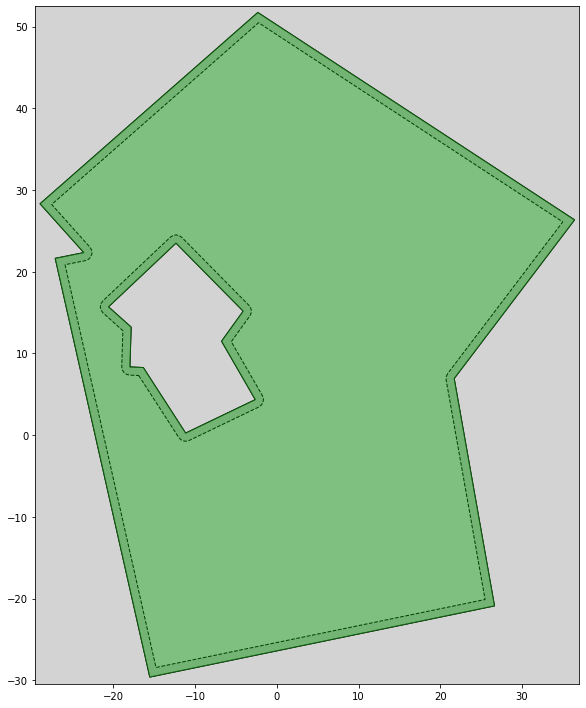

In [43]:
from pcpptc.plot import setup_plot, plot_polygon_instance

ax = setup_plot(figsize=(10, 10))
plot_polygon_instance(ax, instance)
plt.show()

In [56]:
from pcpptc.solver_selection.dmsh import GmshAlgorithm

from pcpptc.instance_converter.dmsh import GmshGrid, DmshGrid

grid_alg = GmshGrid(
    full_coverage=True,
    point_based=False,
    quad=True,
    hole_workround=True,
    alg=9,
    scale=1.0,
    buffer=0.05,
    simplification=0.1,
    iterations=1000,
    hard_corners=True,
)
# grid_alg = DmshGrid(full_coverage=True, point_based=False, scale=1.0, buffer=0.05, simplification=0.1, iterations=0, hard_corners=True)
grid = grid_alg(instance)

using gmesh with Packing of Parallelograms
Good options are 1, 4, and 9.


<Figure size 432x288 with 0 Axes>

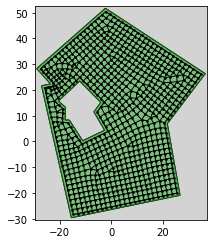

In [57]:
from pcpptc.plot.intermediate import plot_graph

ax = setup_plot(figsize=(3.5, 3.5))
plot_polygon_instance(ax, instance)
plot_graph(
    ax, grid.graph, marker=".", vertex_color="black", edge_color="black", size=10
)
plt.tight_layout()
plt.savefig("09_with_hole_workaround.pdf")
plt.show()

In [46]:
from pcpptc.solver_selection.abstract_solver import convert_tour_to_list
from pcpptc import Solution
from pcpptc.grid_solver import GridSolver


def solve_grid(grid):
    grid_solver = GridSolver(k=3, r=2)

    print("Converting polygon instance to grid instance...")
    grid_instance = grid
    grid_tour = grid_solver(grid_instance)
    print("Done. Converting to tour.")
    solution = Solution(convert_tour_to_list(grid_tour))
    return solution

In [47]:
tour = solve_grid(grid)

Converting polygon instance to grid instance...
Grid Solver:
Cycle Cover Solver:
Using linear programming and blossom matching to compute a cycle cover with turn-aware, heterogeneous touring costs.
IntegralizingFractionalSolverComputing a fractional solution with some BnB steps to improve integrality.Up to 50 BnB steps are performed.
NeighborBasedStripStrategy selecting 6 atomic strips first on usage than on minimizing the worst case overhead.
------------------------------
Local Relaxation CC Optimization:
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plus opportunity loss.
         
- Repeating 25 times.
------------------------------
Local Relaxation Tour Optimization:
- Like CC version but trying to reconnect unconnected solutions up to 10 times.
 - AreaSelector with area size 50.
         Selects the vertex that in sum with its direct neighbors has the highest
         coverage costs plu

Computing coverage polygon
Plotting coverage polygon


<Figure size 432x288 with 0 Axes>

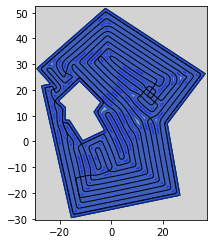

In [48]:
from pcpptc.plot.polgyon_instance import plot_coverage
from pcpptc.plot import plot_solution

ax = setup_plot(figsize=(3.5, 3.5))
plot_polygon_instance(ax, instance)
plot_solution(ax, tour)
plot_coverage(ax, instance, tour)
plt.tight_layout()

plt.savefig("09_tour_with_hole_workaround.pdf")

In [58]:
from pcpptc.solver_selection.dmsh import GmshAlgorithm

from pcpptc.instance_converter.dmsh import GmshGrid

grid_alg = GmshGrid(
    full_coverage=True,
    point_based=False,
    hole_workround=False,
    quad=True,
    alg=9,
    scale=1.0,
    buffer=0.05,
    simplification=0.1,
    iterations=1000,
    hard_corners=True,
)
grid = grid_alg(instance)

using gmesh with Packing of Parallelograms
Good options are 1, 4, and 9.


<Figure size 432x288 with 0 Axes>

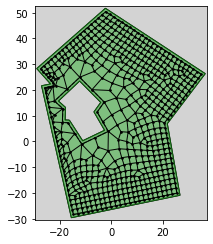

In [59]:
from pcpptc.plot.intermediate import plot_graph

ax = setup_plot(figsize=(3.5, 3.5))
plot_polygon_instance(ax, instance)
plot_graph(
    ax, grid.graph, marker=".", vertex_color="black", edge_color="black", size=10
)
plt.tight_layout()
plt.savefig("09_without_hole_workaround.pdf")
plt.show()

In [51]:
# tour = solve_grid(grid)

<Figure size 432x288 with 0 Axes>

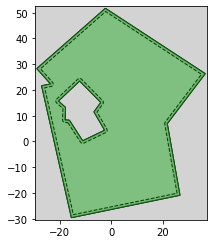

In [52]:
from pcpptc.plot.polgyon_instance import plot_coverage
from pcpptc.plot import plot_solution

ax = setup_plot(figsize=(3.5, 3.5))
plot_polygon_instance(ax, instance)
# plot_solution(ax, tour)
# plot_coverage(ax, instance, tour)
plt.tight_layout()